# Plotting PLINK genotype data

### Bring:
* summary statistics as computed by [PLINK v1.9b](http://pngu.mgh.harvard.edu/~purcell/plink2/index.html)
   
### Take away:
* A better sense of your genotype data, and the effect of filtering decisions.

### Programs used:
* Python packages: numpy, pandas, matplotlib, and seaborn
    
### Steps

### Plotting setup

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

In [2]:
cd /home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes

/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes


#### POPINFO

In [3]:
POPINFO = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/data/POPINFO.txt', sep ="\t")
POPINFO.index += 1
POPINFO.head(11)

,CLUSTER,SILLI,POPNAME,YEAR,TIMING,REGION
1,8,CMSQUA10,Squakum Creek,2010,UNK,Fraser River BC
2,1,CMHAMM10,Hamma Hamma River,2010,Summer,Hood Canal
3,3,CMLILLIW11,Lilliwaup Creek,2011,Fall,Hood Canal
4,10,CMUW10,Hoodsport Hatchery,2010,Fall,Hood Canal
5,7,CMSNOH10,Snohomish River,2010,Fall,North Puget Sound
6,9,CMSTILL10,Stillaguamish River,2010,Fall,North Puget Sound
7,2,CMKALA03,Nisqually R. Kalama Creek,2003,Winter,South Puget Sound
8,4,CMSHERW94F,Sherwood River Fall,1994,Fall,South Puget Sound
9,5,CMSHERW94S,Sherwood River Summer,1994,Summer,South Puget Sound
10,6,CMSKOO10,Skookum Creek,2010,Fall,South Puget Sound


In [4]:
### Coverage

### Missingness per population

In [5]:
imiss = pd.read_csv('non_paralogs.imiss', sep = " ", skipinitialspace = True,index_col = False)
imiss = pd.merge(imiss, POPINFO, left_on = 'FID', right_on='CLUSTER')
imiss.head()

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS,CLUSTER,SILLI,POPNAME,YEAR,TIMING,REGION
0,1,CMHAMM10_0002,Y,1310,12399,0.1057,1,CMHAMM10,Hamma Hamma River,2010,Summer,Hood Canal
1,1,CMHAMM10_0005,Y,2917,12399,0.2353,1,CMHAMM10,Hamma Hamma River,2010,Summer,Hood Canal
2,1,CMHAMM10_0008,Y,1689,12399,0.1362,1,CMHAMM10,Hamma Hamma River,2010,Summer,Hood Canal
3,1,CMHAMM10_0011,Y,2586,12399,0.2086,1,CMHAMM10,Hamma Hamma River,2010,Summer,Hood Canal
4,1,CMHAMM10_0012,Y,1911,12399,0.1541,1,CMHAMM10,Hamma Hamma River,2010,Summer,Hood Canal


/home/ipseg/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1791: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ipseg/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


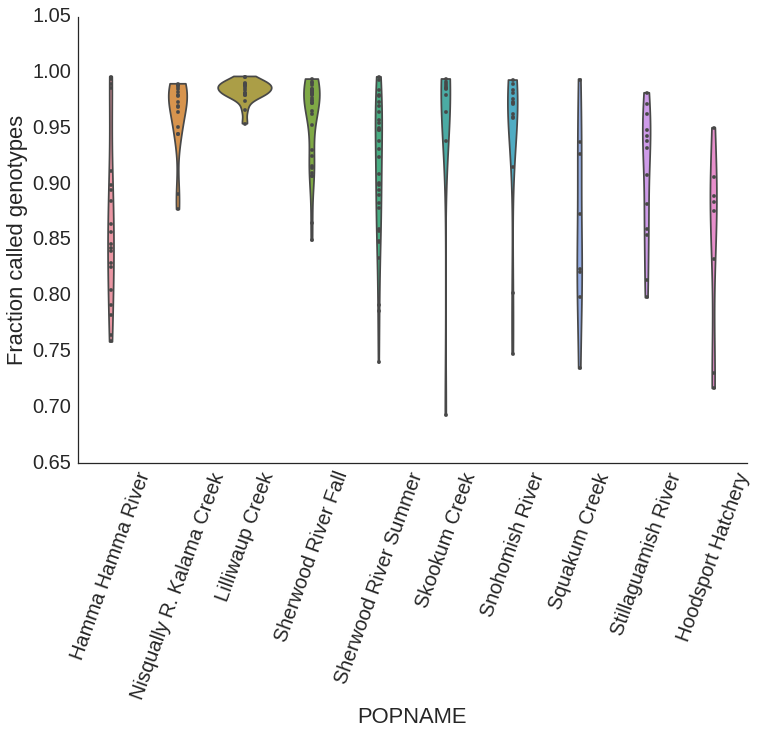

In [6]:
figsize(12, 8)
sns.violinplot(1-imiss['F_MISS'], bw = .5, cut =.01,
               groupby = imiss['POPNAME'], inner="points", inner_kws={"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.ylabel('Fraction called genotypes')
sns.despine()
plt.show()

### Number of missing genotypes - per locus

In [7]:
lmiss = pd.read_csv('non_paralogs.lmiss', sep = " ", skipinitialspace = True,index_col = False)
lmiss_means = lmiss.groupby(['SNP']).mean()
lmiss_sums = lmiss.groupby(['SNP']).sum()

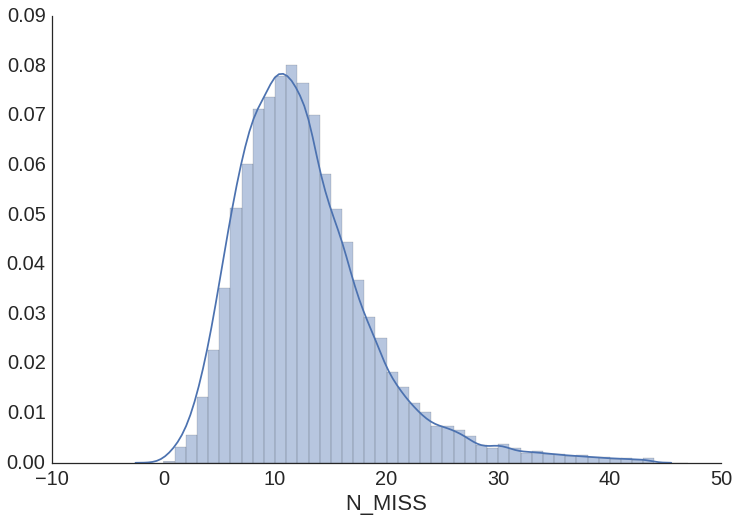

In [8]:
figsize(12,8)
sns.distplot(lmiss_sums['N_MISS'], bins = range(48))
sns.despine()
plt.show()

### Fraction missing - per locus
Distribution of per-locus missingness - mean of population missingness

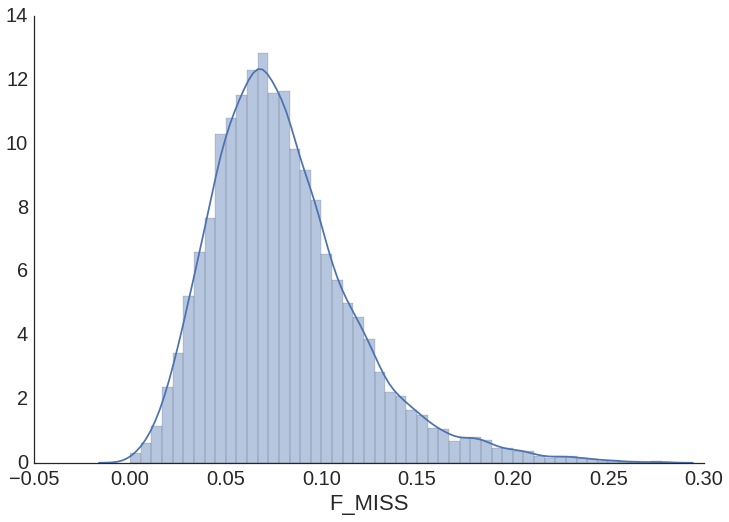

In [9]:
figsize(12,8)
sns.distplot(lmiss_means['F_MISS'])
sns.despine()
plt.show()

## MAF

In [10]:
frq = pd.read_csv('non_paralogs.frq.strat', 
                  sep = " ", skipinitialspace = True, index_col = False)
frq_group_mean = frq.groupby('SNP').mean()

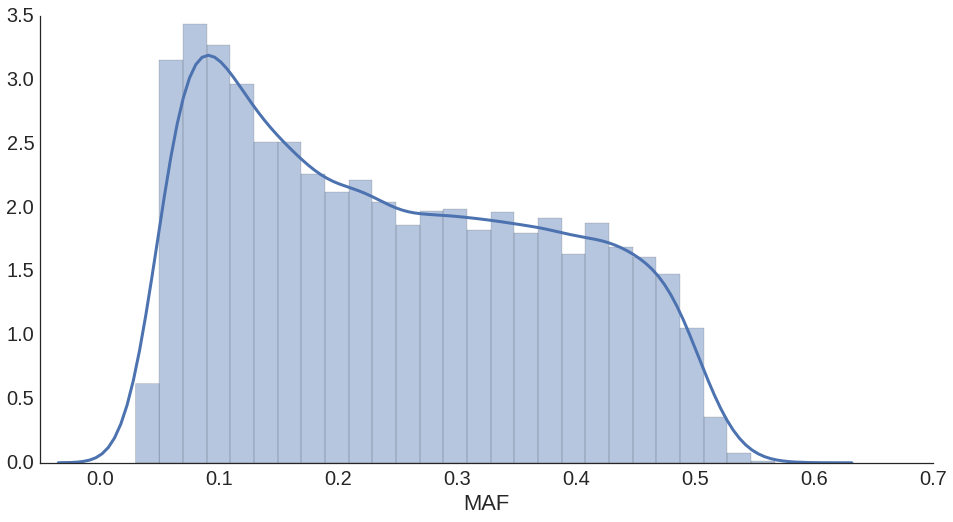

In [11]:
figsize(16, 8)
sns.distplot(frq_group_mean['MAF'], kde_kws = {"lw": 3})
plt.xlim(-.05, .7)
sns.despine()
plt.show()

## The ascertainment effect of using only loci the linkage map

In [12]:
frq_on_map = pd.read_csv('mapped_non_paralogs.frq.strat', 
                  sep = " ", skipinitialspace = True, index_col = False)

num_loci_all = len(set(frq['SNP']))
num_loci_map = len(set(frq_on_map['SNP']))

all_group = frq.groupby('SNP')
map_group = frq_on_map.groupby('SNP')

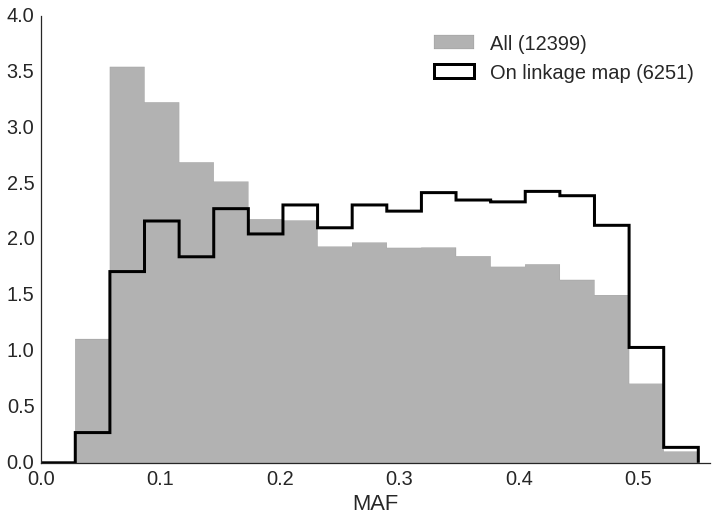

In [13]:
figsize(12, 8)

bins = np.linspace(0.0, .55, 20)

sns.distplot(all_group.mean()['MAF'], kde_kws = {"lw": 0}, bins = bins, kde = True,
             label = 'All ({})'.format(num_loci_all), 
            hist_kws={"histtype": "stepfilled", "alpha": .3, "color": "k"})
sns.distplot(map_group.mean()['MAF'], kde_kws = {"lw": 0}, bins = bins,
             label = 'On linkage map ({})'.format(num_loci_map), 
            hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "k"})
plt.xlim(0, .56)
plt.legend()
sns.despine()
plt.savefig('/home/ipseg/Desktop/waples/chum_populations/paper/figures/ascertainment.png')
plt.show()

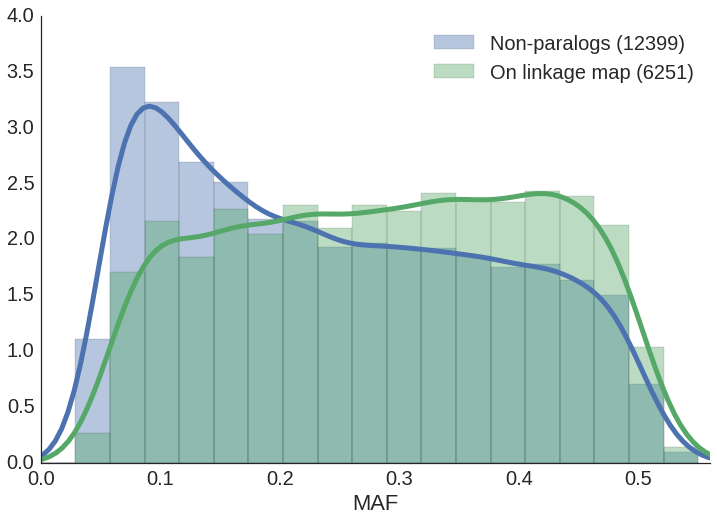

In [16]:
figsize(12, 8)
bins = np.linspace(0.0, .55, 20)

sns.distplot(all_group.mean()['MAF'], kde_kws = {"lw": 5}, bins = bins, kde = True,
             label = 'Non-paralogs ({})'.format(num_loci_all), 
            #hist_kws={"histtype": "bar", "alpha": .3, "color": "k"}
            )
sns.distplot(map_group.mean()['MAF'], kde_kws = {"lw": 5}, bins = bins,
             label = 'On linkage map ({})'.format(num_loci_map), 
            #hist_kws={"histtype": 'bar', "linewidth": 1, "alpha": .5, "color": "g"}
            )
plt.xlim(0, .56)
plt.legend()
sns.despine()
plt.savefig('/home/ipseg/Desktop/waples/chum_populations/paper/figures/ascertainment_color.png')
plt.show()

## Minor allele frequency by population
These MAF are per-population, so can (locally) go above 0.5

In [15]:
frq = pd.merge(frq, POPINFO, left_on = 'CLST', right_on='CLUSTER')

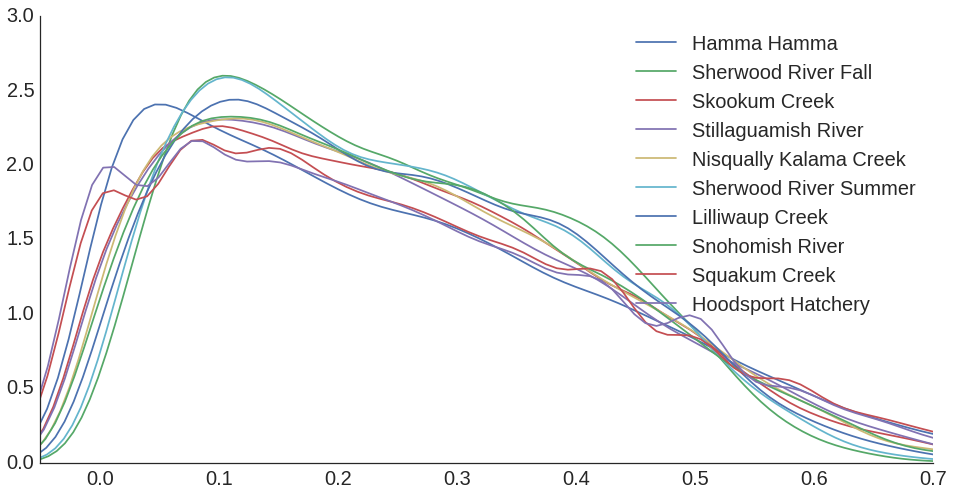

In [16]:
# these MAF are per-population, so can (locally) go above 0.5
figsize(16, 8)

for xx in set(frq['POPNAME']):
    sns.kdeplot(frq['MAF'][frq['POPNAME'] == xx], label = xx)
plt.xlim(-.05, .7)
sns.despine()
plt.show()

## FST
From the PLINK 1.9 documentation:  "computed using the method introduced in [Weir BS, Cockerham CC (1984) Estimating F-statistics for the analysis of population structure](http://dx.doi.org/10.2307/2408641)"

In [17]:
fst = pd.read_csv('non_paralogs.fst', sep= "\t")

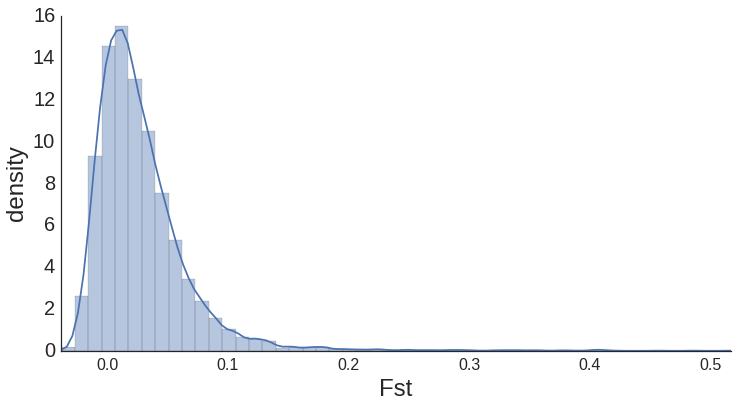

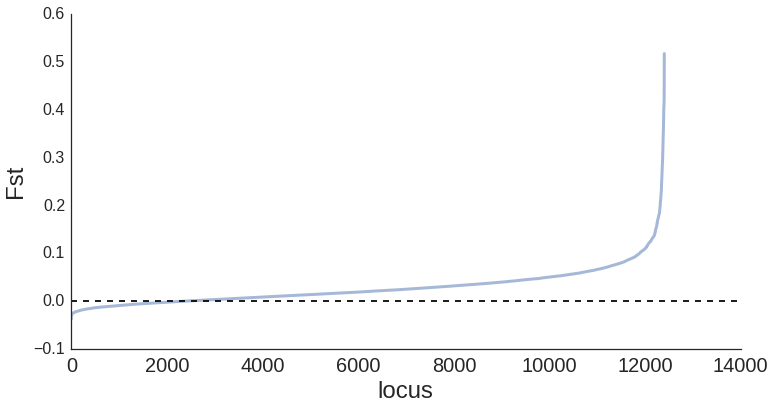

In [18]:
figsize(12, 6)

sns.distplot(fst['FST'], bins = 50)
plt.xlabel('Fst',fontsize = 24); plt.ylabel("density",fontsize = 24)
plt.xticks(fontsize = 16)
plt.xlim(min(fst['FST']), max(fst['FST']))
sns.despine()
plt.show()

plt.plot(fst['FST'].order(), lw = 3, alpha = .5)
plt.axhline(c='black', ls = '--')
plt.xlabel('locus',fontsize = 24); plt.ylabel("Fst",fontsize = 24)
plt.yticks(fontsize = 16)
sns.despine()
plt.show()

## Heterozygosity - mapped loci

In [19]:
from __future__ import division
het = pd.read_csv('mapped_non_paralogs.het', sep= " ", skipinitialspace = True)
het = pd.merge(het, POPINFO, left_on = 'FID', right_on = 'CLUSTER')
het['O_het'] = 1-(het['O(HOM)']/het['N(NM)'])

### Plot of heterozygosity per population - mapped loci
Notice the three high-het outliers from Hoodsport - these were the female parents used for linkage mapping. It makes sense they have high heterozygosity for the mapped loci.

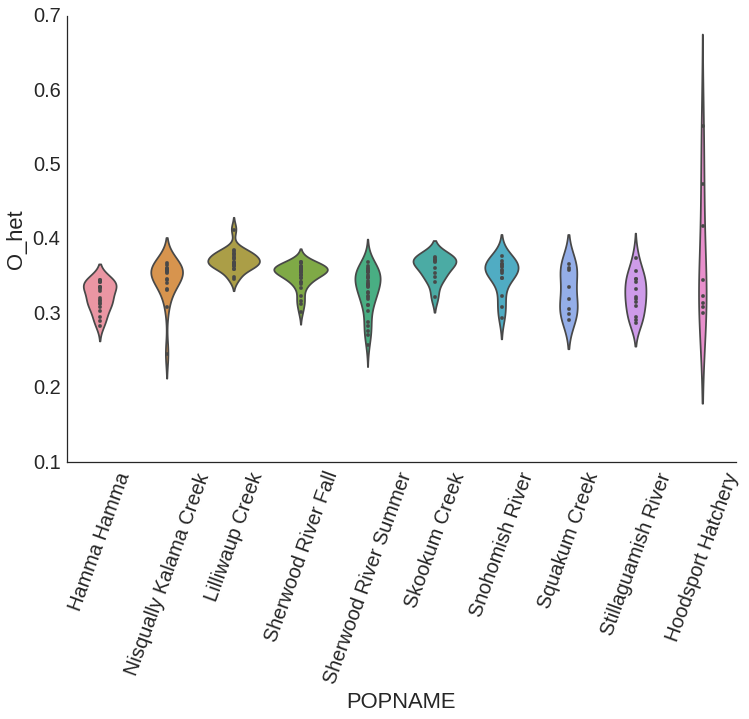

In [20]:
figsize(12, 8)
sns.violinplot(het['O_het'], 
               groupby = het['POPNAME'], inner="points", inner_kws={"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

In [31]:
from __future__ import division
het = pd.read_csv('non_paralogs.het', sep= " ", skipinitialspace = True)
het = pd.merge(het, POPINFO, left_on = 'FID', right_on = 'CLUSTER')
het['O_het'] = 1-(het['O(HOM)']/het['N(NM)'])

In [42]:
pwd

u'/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes'

In [43]:
hetmiss = pd.merge(imiss, het)
hetmiss = hetmiss[['FID', 'CLUSTER', 'POPNAME', 'YEAR','TIMING','REGION','IID', 'F_MISS',  'O_het', 'F']]
hetmiss.head()
hetmiss.to_csv(os.path.join( '..', '..', '..' ,'paper', 'tables', 'hetmiss.txt'), index = False, sep = '\t')

### Plot of heterozygosity per population - all loci

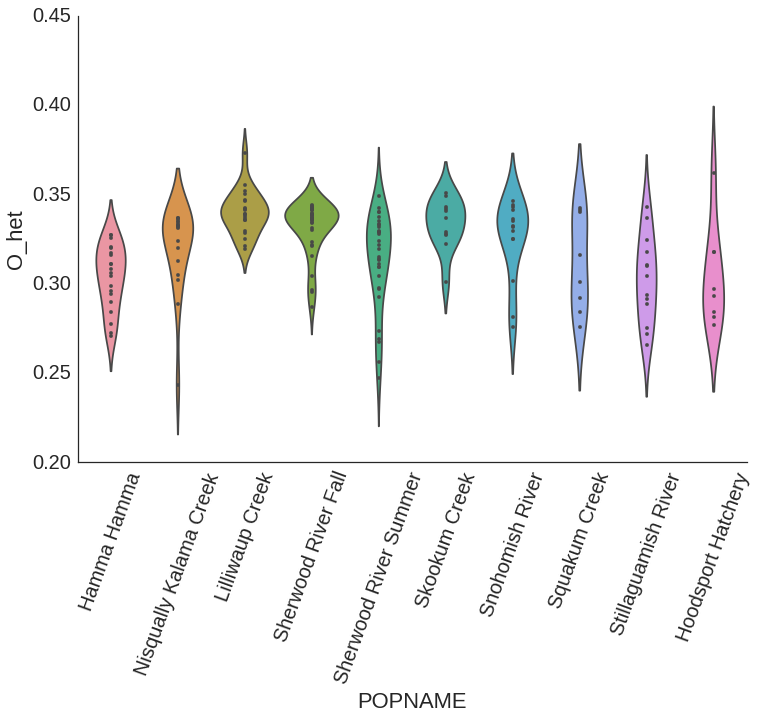

In [22]:
figsize(12, 8)
sns.violinplot(het['O_het'], 
               groupby = het['POPNAME'], inner="points", inner_kws={"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

## Inbreeding

From the PLINK documentation https://www.cog-genomics.org/plink2/basic_stats#ibc:

PLINK calculates three inbreeding coefficients for each sample:
    * Fhat1 is the usual variance-standardized relationship minus 1
    * Fhat2 is computed from the expected autosomal homozygous genotype counts for each sample. Method-of-moments F coefficient estimates (i.e. ([observed hom. count] - [expected count]) / ([total observations] - [expected count])) 
    * Fhat3 is based on the correlation between uniting gametes

In [23]:
ibc = pd.read_csv('non_paralogs.ibc', sep= "\t")

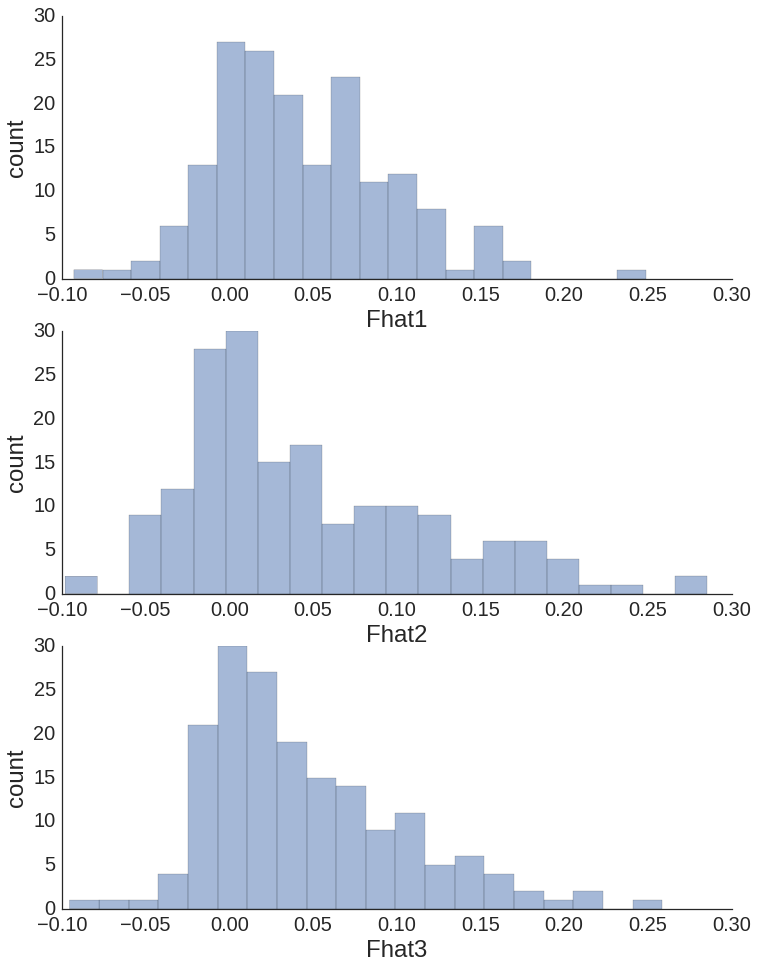

In [24]:
figsize(12, 16)
ax1 = plt.subplot(311)
plt.hist(ibc['Fhat1'] , bins = 20, alpha =.5)
plt.xlabel('Fhat1',fontsize = 24); plt.ylabel("count",fontsize = 24)
plt.subplot(312,sharex=ax1)
plt.hist(ibc['Fhat2'] , bins = 20, alpha =.5)
plt.xlabel('Fhat2',fontsize = 24); plt.ylabel("count",fontsize = 24)
plt.subplot(313, sharex=ax1)
plt.hist(ibc['Fhat3'] , bins = 20, alpha =.5)
plt.xlabel('Fhat3',fontsize = 24); plt.ylabel("count",fontsize = 24)
sns.despine()
plt.show()

## Are Inbreeding coefficients related to missingness? 

In [25]:
x = 1-(ibc['NOMISS']/max(ibc['NOMISS'])) # notice this isn't quite the total % missing, but it's close
y = ibc['Fhat2']
z = np.polyfit(x, y, 1)
fit = np.poly1d(z)

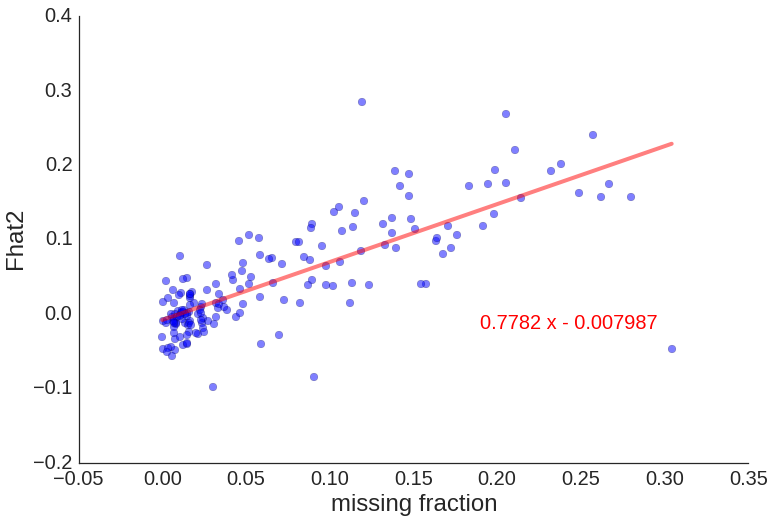

In [26]:
figsize(12, 8)
plt.scatter(x, y, s = 60, alpha = .5)
plt.plot(x.order(), fit(x.order()), 'r', lw = 4, alpha = .5)
plt.xlabel('missing fraction',fontsize = 24); plt.ylabel("Fhat2",fontsize = 24)
plt.annotate(fit,  xycoords='axes fraction', xy = (.6, .3), fontsize = 20, color = 'red')
sns.despine()
plt.show()

## F per population
outlier in hoodsport is likely due to high heterozygosity, which is due in part to the use as a mapping parent for the linkage map.

In [27]:
het = pd.read_csv('non_paralogs.het', sep = " ", skipinitialspace = True)
het = pd.merge(het, POPINFO, left_on = 'FID', right_on = 'CLUSTER')

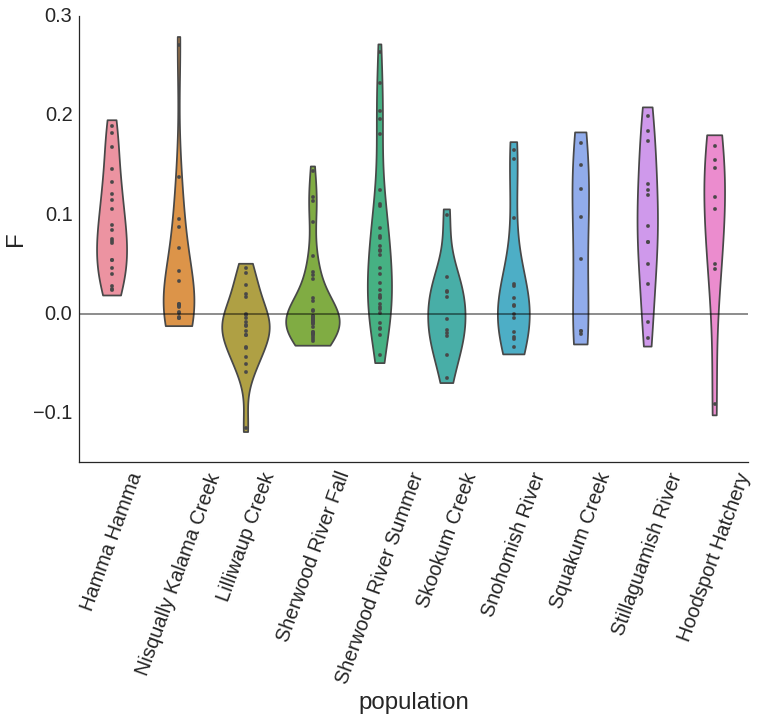

In [28]:
figsize(12, 8)
sns.violinplot(het['F'], groupby = het['POPNAME'], saturation = .8, 
               cut = .2, inner="points", inner_kws={"ms": 16})
plt.axhline(c='black', alpha = .5)
plt.xlabel('population',fontsize = 24); plt.ylabel("F",fontsize = 24)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()